<a href="https://colab.research.google.com/github/thenazar9/global-sales-eda/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Data overview**

In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import unidecode
import matplotlib.ticker as ticker

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/company_product_sales

/content/drive/MyDrive/company_product_sales


In [ ]:
countries_df = pd.read_csv("countries.csv")
events_df = pd.read_csv("events.csv")
products_df = pd.read_csv("products.csv")
print("countries_df:")
print(countries_df.head().to_string(), "\n")
print("events_df:")
print(events_df.head().to_string(), "\n")
print("products_df:")
print(products_df.head().to_string(), "\n")

countries_df:
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia 

events_df:
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID Sales Channel  Units Sold  Unit Price  Unit Cost
0  100640618  10/8/2014  10/18/2014              M          NOR        2103        Online       650.0      205.70     117.11
1  100983083  8/11/2016   8/11/2016              C          SRB        2103       Offline      1993.0      205.70     117.11
2  101025998  7/18/2014   8/11/2014              M          NaN        7940        Online      4693.0      668.27     502.54
3  102230632  5/13/2017   6/13/2017              L          MNE        2455        Online      1171.0      109.28

In [ ]:
print("countries_df:")
print(countries_df.shape, "\n")
print("events_df:")
print(events_df.shape, "\n")
print("products_df:")
print(products_df.shape, "\n")

countries_df:
(249, 5) 

events_df:
(1330, 10) 

products_df:
(12, 2) 



In [ ]:
print("countries_df:")
print(countries_df.info(), "\n")
print("events_df:")
print(events_df.info(), "\n")
print("products_df:")
print(products_df.info(), "\n")

countries_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None 

events_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-nu

In [ ]:
print("countries_df:")
print(countries_df.dtypes, "\n")
print("events_df:")
print(events_df.dtypes, "\n")
print("products_df:")
print(products_df.dtypes, "\n")

countries_df:
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object 

events_df:
Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object 

products_df:
id            int64
item_type    object
dtype: object 



**The *countries_df* dataset contains information about countries:**  
* name - country name  
* alpha-2 - two-letter country code  
* alpha-3	- three-letter country code  
* region - the continent or major region the country belongs to  
* sub-region - a more specific geographical sub-region    

**Insights:**
* Shape of countries_df: (249, 5)
* Missing values: Columns alpha-2, region, and sub-region have missing values (1 missing value in each of these columns).
* Data types: All columns are correctly recognized as object type.

**The *events_df* dataset contains information about sales transactions:**  
* Order ID - unique identifier for each order  
* Order Date - date when the order was placed   
* Ship Date - date when the order was shipped  
* Order Priority - priority level of the order  
* Country Code - country code where the order was placed  
* Product ID - unique identifier for the product  
* Sales Channel - whether the sale was made online or offline  
* Units Sold - number of units sold in the order  
* Unit Price - price per unit of the product  
* Unit Cost - cost per unit of the product  

**Insights:**
* Shape of events_df: (1330, 10)
* Missing values: Columns Country Code (82 missing values) and Units Sold (2 missing values) have missing data.
* Data types: Order Date and Ship Date columns are in object type, but they should be converted to datetime. All other data types are correct.

**The *products_df* dataset contains information about products:**  
* id - unique product identifier  
* item_type - category or type of the product

**Insights:**
* Shape of products_df: (12, 2)
* Missing values: There are no missing values in this dataset.
* Data types: All columns are correctly recognized.

**The key fields that link the three tables are:**  
1. alpha-3 (from the countries_df dataset) and Country Code (from the events_df dataset)  
2. id (from the products_df dataset) and Product ID (from the events_df dataset)

###**Data cleaning**

####Data cleaning for **countries_df_clean** (copy of 'countries_df')

In [ ]:
countries_df_clean = countries_df.copy()

In [ ]:
# missing value proportion
countries_df_clean.isna().sum() / countries_df_clean.shape[0]

,0
name,0.000000
alpha-2,0.004016
alpha-3,0.000000
region,0.004016
sub-region,0.004016


Since the proportion of missing values does not exceed 0.004%, I removed the rows containing missing values.

In [ ]:
# removing missing values
countries_df_clean = countries_df_clean.dropna()

In [ ]:
# removing extra spaces
countries_df_clean = countries_df_clean.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

# convert all text values ​​to lowercase
countries_df_clean = countries_df_clean.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

# normalizing non-ASCII characters to ASCII
countries_df_clean = countries_df_clean.apply(lambda col: col.map(unidecode.unidecode) if col.dtype == 'object' else col)

# removing characters that are not lowercase letters, digits, spaces, parentheses, periods, or hyphens
countries_df_clean = countries_df_clean.replace(r"[^a-z0-9\s\(\)\.\-]", "", regex=True)

print(countries_df_clean.duplicated().sum())

0


No duplicates found

In [ ]:
# displaying unique values for each column
print(countries_df_clean['name'].unique(), "\n")
print(countries_df_clean['alpha-2'].unique(), "\n")
print(countries_df_clean['alpha-3'].unique(), "\n")
print(countries_df_clean['region'].unique(), "\n")
print(countries_df_clean['sub-region'].unique(), "\n")

['afghanistan' 'aland islands' 'albania' 'algeria' 'american samoa'
 'andorra' 'angola' 'anguilla' 'antigua and barbuda' 'argentina' 'armenia'
 'aruba' 'australia' 'austria' 'azerbaijan' 'bahamas' 'bahrain'
 'bangladesh' 'barbados' 'belarus' 'belgium' 'belize' 'benin' 'bermuda'
 'bhutan' 'bolivia (plurinational state of)'
 'bonaire sint eustatius and saba' 'bosnia and herzegovina' 'botswana'
 'bouvet island' 'brazil' 'british indian ocean territory'
 'brunei darussalam' 'bulgaria' 'burkina faso' 'burundi' 'cabo verde'
 'cambodia' 'cameroon' 'canada' 'cayman islands'
 'central african republic' 'chad' 'chile' 'china' 'christmas island'
 'cocos (keeling) islands' 'colombia' 'comoros' 'congo'
 'congo democratic republic of the' 'cook islands' 'costa rica'
 'cote divoire' 'croatia' 'cuba' 'curacao' 'cyprus' 'czech republic'
 'denmark' 'djibouti' 'dominica' 'dominican republic' 'ecuador' 'egypt'
 'el salvador' 'equatorial guinea' 'eritrea' 'estonia' 'eswatini'
 'ethiopia' 'falkland islands 

**Data cleaning for *countries_df_clean* involved several key steps:**

1. Handling missing values: Missing data was identified, and rows with missing values were dropped.
2. Trimming extra spaces: Leading and trailing spaces were removed from string columns.
3. Text normalization: All text values were converted to lowercase for consistency.
4. Non-ASCII character normalization: Non-ASCII characters were converted to ASCII.
5. Character cleaning: Unwanted characters (anything not a lowercase letter, number, space, parentheses, period or hyphen) were removed.
6. Duplicate check: No duplicates were found in the dataset.

####Data cleaning for **events_df_clean** (copy of 'events_df')

In [ ]:
events_df_clean = events_df.copy()

In [ ]:
events_df_clean.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [ ]:
events_df_clean.isna().sum() / events_df_clean.shape[0]

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,0.061654
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.001504
Unit Price,0.000000
Unit Cost,0.000000


In [ ]:
# fill missing values in the "Country Code" column with the string "unknown"
events_df_clean["Country Code"] = events_df_clean["Country Code"].fillna("unknown")
events_df_clean["Country Code"].unique()

array(['NOR', 'SRB', 'unknown', 'MNE', 'SVK', 'FRA', 'ESP', 'HRV', 'DEU',
       'ARM', 'GEO', 'GBR', 'SVN', 'ROU', 'POL', 'LUX', 'CYP', 'BEL',
       'LTU', 'RUS', 'MLT', 'UKR', 'CZE', 'PRT', 'BLR', 'EST', 'AUT',
       'MKD', 'SMR', 'NLD', 'CHE', 'HUN', 'LVA', 'BGR', 'ITA', 'IRL',
       'AND', 'LIE', 'FIN', 'ALB', 'SWE', 'BIH', 'DNK', 'MCO', 'ISL',
       'GRC'], dtype=object)

Since the missing values in the "Country Code" column represent about 6% of the data, I decided to fill them with "unknown" rather than delete these rows. This way, I avoid losing valuable records and can still acknowledge the missing data in the analysis.

In [ ]:
# dropping rows with missing values in the entire dataset
events_df_clean = events_df_clean.dropna()


In [ ]:
# changing the data type of "Order Date" and "Ship Date" columns from object to datetime
events_df_clean["Order Date"] = pd.to_datetime(events_df_clean["Order Date"])
events_df_clean["Ship Date"] = pd.to_datetime(events_df_clean["Ship Date"])

<ipython-input-19-62b29c374c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df_clean["Order Date"] = pd.to_datetime(events_df_clean["Order Date"])
<ipython-input-19-62b29c374c91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df_clean["Ship Date"] = pd.to_datetime(events_df_clean["Ship Date"])


Since the proportion of missing values does not exceed 0.0015%, I removed the rows containing missing values.

In [ ]:
# removing extra spaces
events_df_clean = events_df_clean.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# convert all text values ​​to lowercase
events_df_clean = events_df_clean.apply(lambda col: col.str.lower() if col.dtype == "object" else col)

# normalizing non-ASCII characters to ASCII
events_df_clean = events_df_clean.apply(lambda col: col.map(unidecode.unidecode) if col.dtype == "object" else col)

# removing characters that are not lowercase letters, digits, spaces, parentheses, periods, or hyphens
events_df_clean.replace(r"^a-z0-9\s", "", regex=True)


print(events_df_clean.duplicated().sum())


0


In [ ]:
# displaying unique values for "Order Priority", "Country Code", and "Sales Channel" columns
# these columns contain categorical data, so displaying the unique values helps identify distinct categories and ensure data consistency.
print(events_df_clean["Order Priority"].unique(), "\n")
print(events_df_clean["Country Code"].unique(), "\n")
print(events_df_clean["Sales Channel"].unique(), "\n")

['m' 'c' 'l' 'h'] 

['nor' 'srb' 'unknown' 'mne' 'svk' 'fra' 'esp' 'hrv' 'deu' 'arm' 'geo'
 'gbr' 'svn' 'rou' 'pol' 'lux' 'cyp' 'bel' 'ltu' 'rus' 'mlt' 'ukr' 'cze'
 'prt' 'blr' 'est' 'aut' 'mkd' 'smr' 'nld' 'che' 'hun' 'lva' 'bgr' 'ita'
 'irl' 'and' 'lie' 'fin' 'alb' 'swe' 'bih' 'dnk' 'mco' 'isl' 'grc'] 

['online' 'offline'] 



In [ ]:
# get descriptive statistics for the 'Units Sold', 'Unit Price', and 'Unit Cost' columns
events_df_clean[["Units Sold",	"Unit Price",	"Unit Cost"]].describe()

,Units Sold,Unit Price,Unit Cost
count,1328.000000,1328.000000,1328.000000
mean,4952.201807,264.913245,187.211521
std,2905.198996,217.386320,176.187801
min,2.000000,9.330000,6.920000
25%,2356.750000,81.730000,35.840000
50%,4962.000000,154.060000,97.440000
75%,7459.500000,437.200000,263.330000
max,9999.000000,668.270000,524.960000


The values in the columns Units Sold, Unit Price, and Unit Cost are within logical ranges and do not contain unnatural or critically distant values.

In [ ]:
# filter the rows where the 'Order Date' is later than the 'Ship Date' and display them
invalid_dates = events_df_clean[events_df_clean['Order Date'] > events_df_clean['Ship Date']]
print(invalid_dates)


Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []


In the events_df_clean DataFrame, there are no rows where the order date (Order Date) is later than the ship date (Ship Date). This means that all the dates are correctly specified, and there are no logical errors in this aspect.

####Data cleaning for **products_df_clean** (copy of 'products_df')

In [ ]:
products_df_clean = products_df.copy()


In [ ]:
# convert all text values ​​to lowercase
products_df_clean = products_df_clean.apply(lambda col: col.str.lower() if col.dtype=="object" else col)

# normalizing non-ASCII characters to ASCII
products_df_clean = products_df_clean.apply(lambda col: col.map(unidecode.unidecode) if col.dtype=="object" else col)

products_df_clean

,id,item_type
0,2103,cereal
1,7940,household
2,2455,clothes
3,1270,beverages
4,8681,office supplies
5,4594,fruits
6,5988,vegetables
7,7331,baby food
8,8875,meat
9,8293,cosmetics


The dataset is small and contains no missing values, duplicates or anomalies. All data types are correct. To ensure consistency with other datasets, the item_type column has been converted to lowercase. Additionally, the text has been normalized to Unicode format to prevent potential encoding issues.

####Merging, Cleaning and Transforming the Sales Data for Analysis ("**sales_data_df**")

In [ ]:
# merging the events, countries, and products dataframes
sales_data_df = pd.merge(events_df_clean, countries_df_clean, left_on="Country Code", right_on="alpha-3", how="left")
sales_data_df = pd.merge(sales_data_df, products_df_clean, left_on="Product ID", right_on="id")

In [ ]:
# dropping unnecessary columns from sales_data_df
sales_data_df = sales_data_df.drop(["Country Code", "Product ID", "alpha-2", "alpha-3", "id"], axis=1)

In [ ]:
# applying title case to the relevant columns
sales_data_df["Sales Channel"] = sales_data_df["Sales Channel"].str.title()
sales_data_df["name"] = sales_data_df["name"].str.title()
sales_data_df["region"] = sales_data_df["region"].str.title()
sales_data_df["sub-region"] = sales_data_df["sub-region"].str.title()
sales_data_df["item_type"] = sales_data_df["item_type"].str.title()
sales_data_df["Order Priority"] = sales_data_df["Order Priority"].str.upper()

# renaming the columns for better clarity and consistency
sales_data_df = sales_data_df.rename(columns={"name": "country"})
sales_data_df = sales_data_df.rename(columns={"item_type": "item type"})

# converting all column names to Title Case
sales_data_df.columns = sales_data_df.columns.str.title()

# fill missing values in the sales_data_df with the string "unknown"
sales_data_df = sales_data_df.replace(pd.NA, 'Unknown')

sales_data_df.head()

,Order Id,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,Country,Region,Sub-Region,Item Type
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,101025998,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Unknown,Unknown,Unknown,Household
3,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
4,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages


###**Data analysis and visualization**

In [ ]:
# adding financial metrics and order processing time to the dataset
sales_data_df["Total Sales"] = sales_data_df["Units Sold"] * sales_data_df["Unit Price"]
sales_data_df["Total Cost"] = sales_data_df["Units Sold"] * sales_data_df["Unit Cost"]
sales_data_df["Total Profit"] = sales_data_df["Total Sales"] - sales_data_df["Total Cost"]
sales_data_df["Order to Ship Time (days)"] = (sales_data_df["Ship Date"] - sales_data_df["Order Date"]).dt.days

sales_data_df.head()

,Order Id,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,Country,Region,Sub-Region,Item Type,Total Sales,Total Cost,Total Profit,Order to Ship Time (days)
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,10
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,0
2,101025998,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Unknown,Unknown,Unknown,Household,3136191.11,2358420.22,777770.89,24
3,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,31
4,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,38


####Key Performance Metrics

In [ ]:
# calculating key metrics
total_orders = sales_data_df["Order Id"].nunique()
total_sales = sales_data_df["Total Sales"].sum()
total_expenses = sales_data_df["Total Cost"].sum()
total_profit = sales_data_df["Total Profit"].sum()
total_countries_covered = sales_data_df.loc[sales_data_df["Country"] != "Unknown", "Country"].nunique()
average_unit_price  = sales_data_df["Unit Price"].mean()
average_delivery_time = sales_data_df["Order to Ship Time (days)"].mean()

print(f"Total Orders: {total_orders}")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Expenses: ${total_expenses:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Countries Covered: {total_countries_covered}")
print(f"Average Unit Price: ${average_unit_price:,.2f}")
print(f"Average Delivery Time: {average_delivery_time:.2f} days")

Total Orders: 1328
Total Sales: $1,702,129,408.21
Total Expenses: $1,200,694,949.21
Total Profit: $501,434,459.00
Total Countries Covered: 45
Average Unit Price: $264.91
Average Delivery Time: 24.79 days


The company has processed a total of 1328 orders, generating a total sales of 1,702,129,408.21 dollars. After deducting costs, the company achieved a total profit of 501,434,459.00 dollars, with total expenses amounting to 1,200,694,949.21 dollars. The company operates across 45 countries. On average, the unit price of products sold is 264.91 dollars, and the average delivery time is 24.79 days.

####Revenue, Cost, Profit, and Popularity of Items by Category

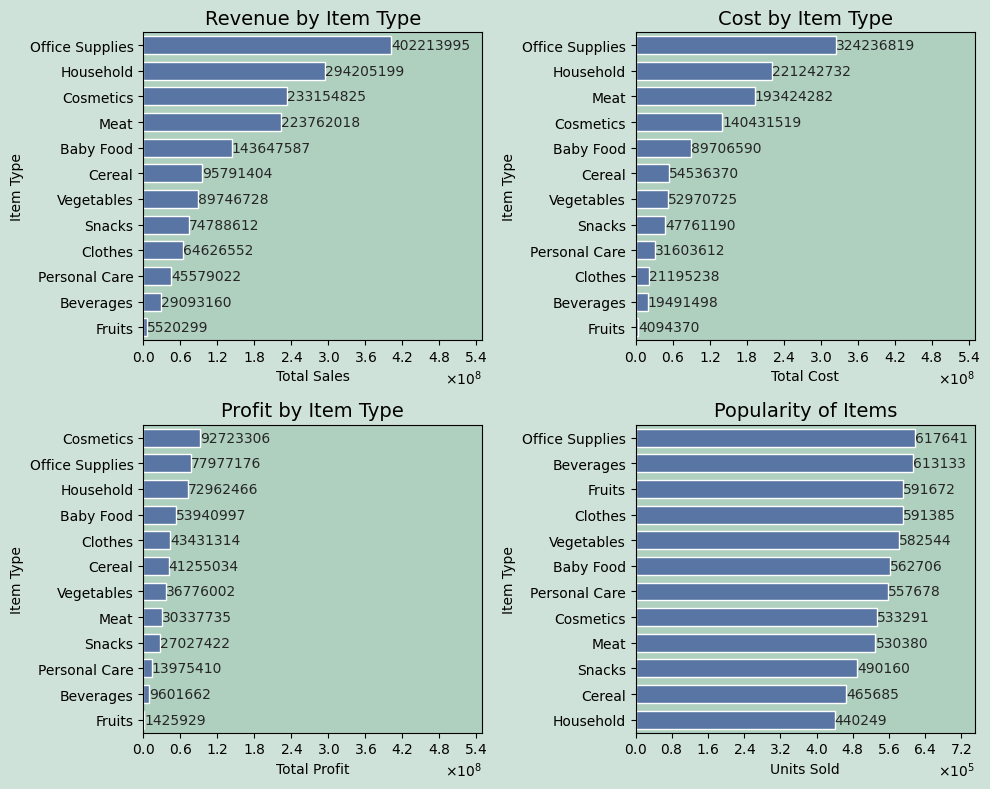

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

colors_deep = sns.color_palette("deep")

# using MaxNLocator to automatically display numbers in scientific notation for all graphs
for axis in ax.flat:
    axis.xaxis.set_major_locator(ticker.MaxNLocator())
    axis.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# [0, 0] Total Sales by Item Type
revenue_by_category = sales_data_df.groupby("Item Type")["Total Sales"].sum().reset_index().sort_values(by="Total Sales", ascending=False)

sns.barplot(data=revenue_by_category, x="Total Sales", y="Item Type", ax=ax[0, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 0].set_title("Revenue by Item Type", fontsize=14, fontweight = "medium")
ax[0, 0].set_xlim(0, 5.5e8)

for bar in ax[0, 0].patches:
    ax[0, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [0, 1] Total Cost by Item Type
cost_by_category = sales_data_df.groupby("Item Type")["Total Cost"].sum().reset_index().sort_values(by="Total Cost", ascending=False)

sns.barplot(data=cost_by_category, x="Total Cost", y="Item Type", ax=ax[0, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 1].set_title("Cost by Item Type", fontsize=14, fontweight = "medium")
ax[0, 1].set_xlim(0, 5.5e8)

for bar in ax[0, 1].patches:
    ax[0, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 0] Total Profit by Item Type
profit_by_category = sales_data_df.groupby("Item Type")["Total Profit"].sum().reset_index().sort_values(by="Total Profit", ascending=False)

sns.barplot(data=profit_by_category, x="Total Profit", y="Item Type", ax=ax[1, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 0].set_title("Profit by Item Type", fontsize=14, fontweight = "medium")
ax[1, 0].set_xlim(0, 5.5e8)

for bar in ax[1, 0].patches:
    ax[1, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 1] Popularity of Items by Units Sold
popularity_items_by_category = sales_data_df.groupby("Item Type")["Units Sold"].sum().reset_index().sort_values(by="Units Sold", ascending=False)

sns.barplot(data=popularity_items_by_category, x="Units Sold", y="Item Type", ax=ax[1, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 1].set_title("Popularity of Items", fontsize=14, fontweight = "medium")
ax[1, 1].set_xlim(0, 7.5e5)


for bar in ax[1, 1].patches:
    ax[1, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

plt.tight_layout()
plt.show()

**Revenue and Cost Dynamics:**  
"Office Supplies" dominate in both revenue and cost, indicating high sales volume.
"Household," "Meat," and "Cosmetics" also contribute significantly to both revenue and cost.

**Profitability:**  
"Cosmetics" emerge as the most profitable category, showcasing a high-profit margin despite not leading in overall revenue.
"Office supplies" also creates a good profit.
"Fruits" bring the least profit, despite their high popularity, likely due to factors like perishability and competitive pricing.

**Product Popularity:**  
"Office Supplies" lead in units sold, confirming their high demand.
"Beverages," "Fruits," "Clothes," and "Vegetables" also demonstrate substantial popularity.

**Overall Conclusion:**  
These insights suggest that while "Office Supplies" drive significant sales volume, "Cosmetics" deliver the highest profitability. The low profitability of "Fruits," despite their popularity, highlights the need to investigate factors such as pricing strategies and operational costs to optimize returns in this category.

####Top 10 Countries by Revenue, Cost, Profit, and Item Popularity

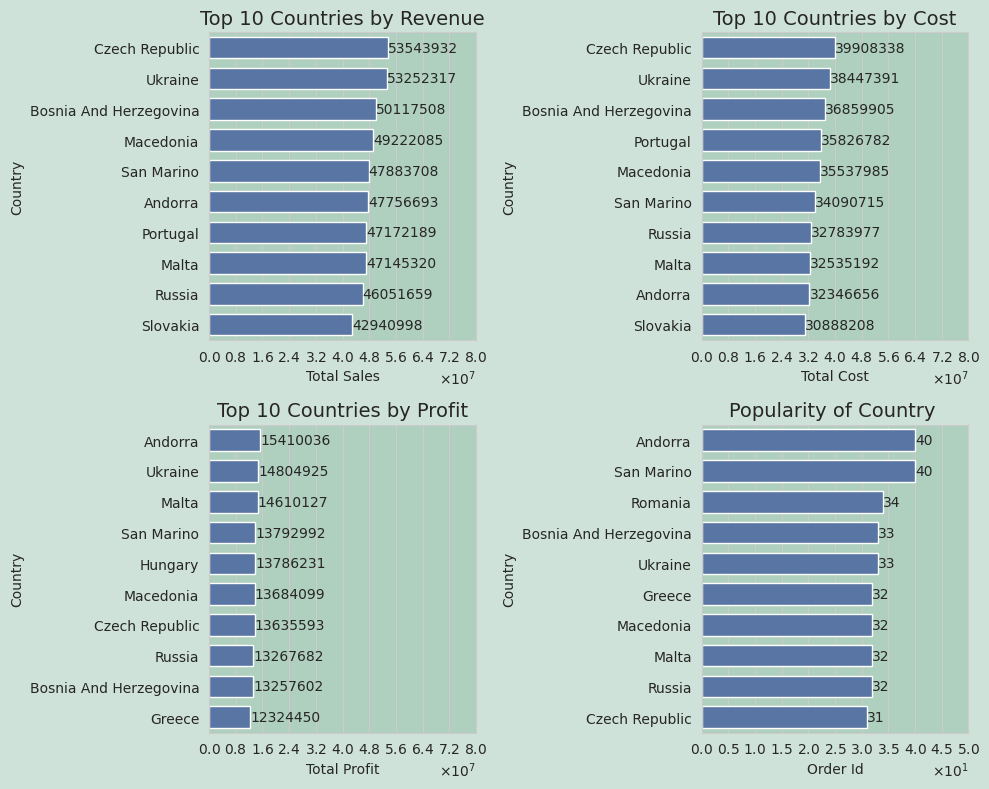

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

# using MaxNLocator to automatically display numbers in scientific notation for all graphs
for axis in ax.flat:
    axis.xaxis.set_major_locator(ticker.MaxNLocator())
    axis.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# [0, 0] Total Sales by Country
revenue_by_country = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby("Country")["Total Sales"].sum().reset_index().sort_values(by="Total Sales", ascending=False).nlargest(10, "Total Sales")

sns.barplot(data=revenue_by_country, x="Total Sales", y="Country", ax=ax[0, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 0].set_title("Top 10 Countries by Revenue", fontsize=14, fontweight = "medium")
ax[0, 0].set_xlim(0, 0.8e8)

for bar in ax[0, 0].patches:
    ax[0, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [0, 1] Total Cost by Country
cost_by_country = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby("Country")["Total Cost"].sum().reset_index().sort_values(by="Total Cost", ascending=False).nlargest(10, "Total Cost")

sns.barplot(data=cost_by_country, x="Total Cost", y="Country", ax=ax[0, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 1].set_title("Top 10 Countries by Cost", fontsize=14, fontweight = "medium")
ax[0, 1].set_xlim(0, 0.8e8)

for bar in ax[0, 1].patches:
    ax[0, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 0] Total Profit by Country
profit_by_country = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby("Country")["Total Profit"].sum().reset_index().sort_values(by="Total Profit", ascending=False).nlargest(10, "Total Profit")

sns.barplot(data=profit_by_country, x="Total Profit", y="Country", ax=ax[1, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 0].set_title("Top 10 Countries by Profit", fontsize=14, fontweight = "medium")
ax[1, 0].set_xlim(0, 0.8e8)

for bar in ax[1, 0].patches:
    ax[1, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 1] Popularity of Country
sales_count_by_country = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby("Country")["Order Id"].count().reset_index().sort_values(by="Order Id", ascending=False).nlargest(10, "Order Id")

sns.barplot(data=sales_count_by_country, x="Order Id", y="Country", ax=ax[1, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 1].set_title("Popularity of Country ", fontsize=14, fontweight="medium")
ax[1, 1].set_xlim(0, 5e1)

for bar in ax[1, 1].patches:
    ax[1, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

plt.tight_layout()
plt.show()

**Revenue and Cost Dynamics (by Country):**  
"Czech Republic" and "Ukraine" lead in both revenue and cost, indicating high sales volume in these countries.
"Bosnia and Herzegovina," "Macedonia," and "San Marino" also contribute significantly to both revenue and cost.

**Profitability (by Country):**  
"Andorra" emerges as the most profitable country, suggesting efficient cost management or higher profit margins.
"Ukraine," "Malta," and "San Marino" also generate substantial profits.
"Czech Republic" while having high revenue and cost, is in the middle of profit ranking.

**Country Popularity (by Order ID):**  
"San Marino" and "Andorra" have the highest number of orders, indicating strong customer engagement.
"Romania," "Ukraine," and "Bosnia and Herzegovina" also demonstrate significant order volume.

**Overall Conclusion:**  
These insights reveal that while "Czech Republic" and "Ukraine" drive significant sales volume, "Andorra" excels in profitability. The high order volume in "San Marino" and "Andorra" suggests strong market penetration or customer loyalty in these regions. The difference between high revenue/cost countries and high profit countries might be caused by different business strategies, cost of operations and tax policies.

####Sales Analysis by Channels (Online/Offline)

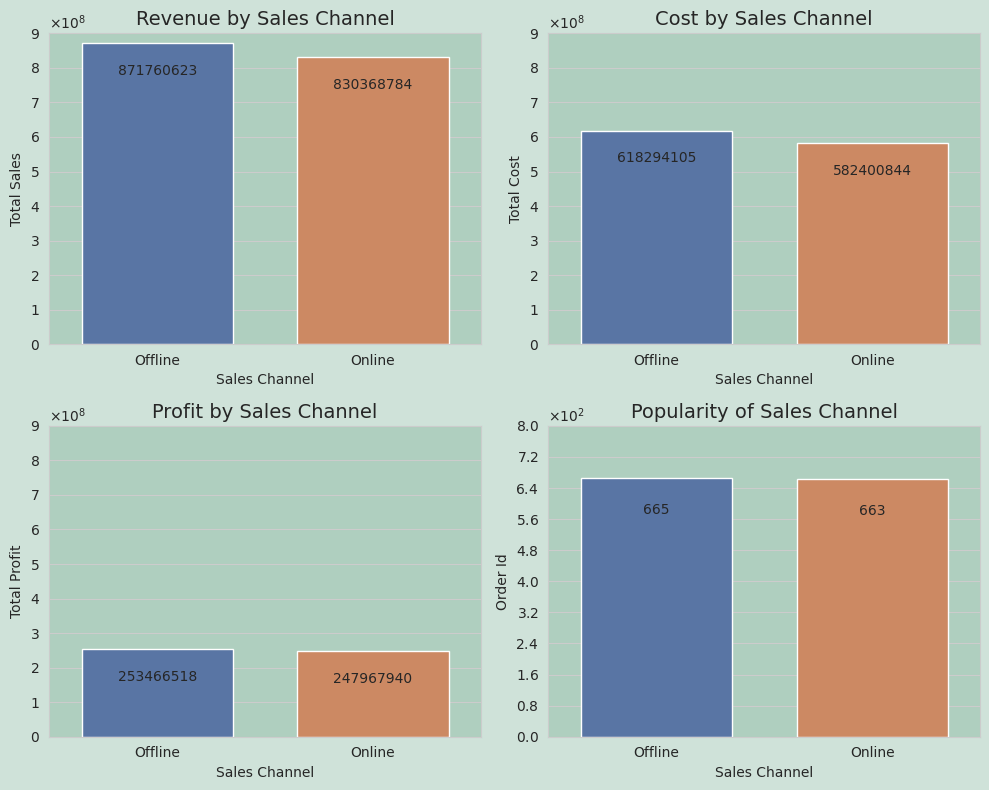

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

# using MaxNLocator to automatically display numbers in scientific notation for all graphs
for axis in ax.flat:
    axis.yaxis.set_major_locator(ticker.MaxNLocator())
    axis.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axis.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# [0, 0] Total Sales by Sales Channel
revenue_by_channel = sales_data_df.groupby("Sales Channel")["Total Sales"].sum().reset_index().sort_values(by="Total Sales", ascending=False)

sns.barplot(data=revenue_by_channel, x="Sales Channel", y="Total Sales", ax=ax[0, 0], hue="Sales Channel", palette="deep", errorbar=("ci", False), width=0.7)
ax[0, 0].set_title("Revenue by Sales Channel", fontsize=14, fontweight = "medium")
ax[0, 0].set_ylim(0, 9e8)

for bar in ax[0, 0].patches:
  ax[0, 0].text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() -1e8,
      f"{int(bar.get_height())}",
      ha="center",
      va="bottom",
      fontsize = 10
  )

# [0, 1] Total Cost by Sales Channel
cost_by_channel = sales_data_df.groupby("Sales Channel")["Total Cost"].sum().reset_index().sort_values(by="Total Cost", ascending=False)

sns.barplot(data=cost_by_channel, x="Sales Channel", y="Total Cost", ax=ax[0, 1], hue="Sales Channel", palette="deep", errorbar=("ci", False), width=0.7)
ax[0, 1].set_title("Cost by Sales Channel", fontsize=14, fontweight = "medium")
ax[0, 1].set_ylim(0, 9e8)

for bar in ax[0, 1].patches:
  ax[0, 1].text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() -1e8,
      f"{int(bar.get_height())}",
      ha="center",
      va="bottom",
      fontsize = 10
  )

# [1, 0] Total Profit by Sales Channel
cost_by_channel = sales_data_df.groupby("Sales Channel")["Total Profit"].sum().reset_index().sort_values(by="Total Profit", ascending=False)

sns.barplot(data=cost_by_channel, x="Sales Channel", y="Total Profit", ax=ax[1, 0], hue="Sales Channel", palette="deep", errorbar=("ci", False), width=0.7)
ax[1, 0].set_title("Profit by Sales Channel", fontsize=14, fontweight = "medium")
ax[1, 0].set_ylim(0, 9e8)

for bar in ax[1, 0].patches:
  ax[1, 0].text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() -1e8,
      f"{int(bar.get_height())}",
      ha="center",
      va="bottom",
      fontsize = 10
  )

  # [1, 1] Popularity of Sales Channel
cost_by_channel = sales_data_df.groupby("Sales Channel")["Order Id"].count().reset_index().sort_values(by="Order Id", ascending=False)

sns.barplot(data=cost_by_channel, x="Sales Channel", y="Order Id", ax=ax[1, 1], hue="Sales Channel", palette="deep", errorbar=("ci", False), width=0.7)
ax[1, 1].set_title("Popularity of Sales Channel", fontsize=14, fontweight = "medium")
ax[1, 1].set_ylim(0, 8e2)

for bar in ax[1, 1].patches:
  ax[1, 1].text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() -1e2,
      f"{int(bar.get_height())}",
      ha="center",
      va="bottom",
      fontsize = 10
  )

plt.tight_layout()
plt.show()

**Revenue and Cost Dynamics:**  
The offline channel generates higher revenue and incurs higher costs compared to the online channel.

**Profitability:**  
The offline channel makes a bit more profit, but both channels are enough profitability.

**Channel Popularity:**  
Both offline and online channels have nearly the same number of orders, meaning they are almost equally popular.

**Overall Conclusion:**  
The offline channel brings a little bit more money and profit, but both offline and online sales are very close in popularity. This suggests the company has a strong presence in both sales channels.

####Order Processing Time by Categories, Countries, and Regions

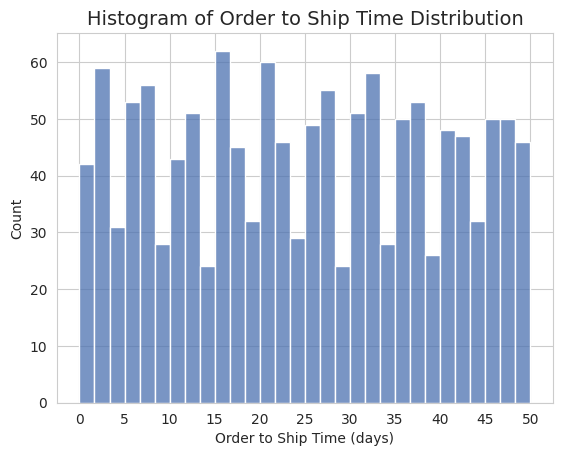

In [ ]:
# histogram of Order to Ship Time distribution
sns.histplot(sales_data_df["Order to Ship Time (days)"], bins=30, color=colors_deep[0])
plt.title("Histogram of Order to Ship Time Distribution", fontsize=14, fontweight = "medium")
plt.xticks(np.arange(0, sales_data_df["Order to Ship Time (days)"].max() + 5, 5))
plt.show()

The histogram shows the distribution of "Order to Ship Time" in days. The data is relatively evenly distributed across the range, with no significant outliers or skewness. This suggests a consistent and predictable order fulfillment process.

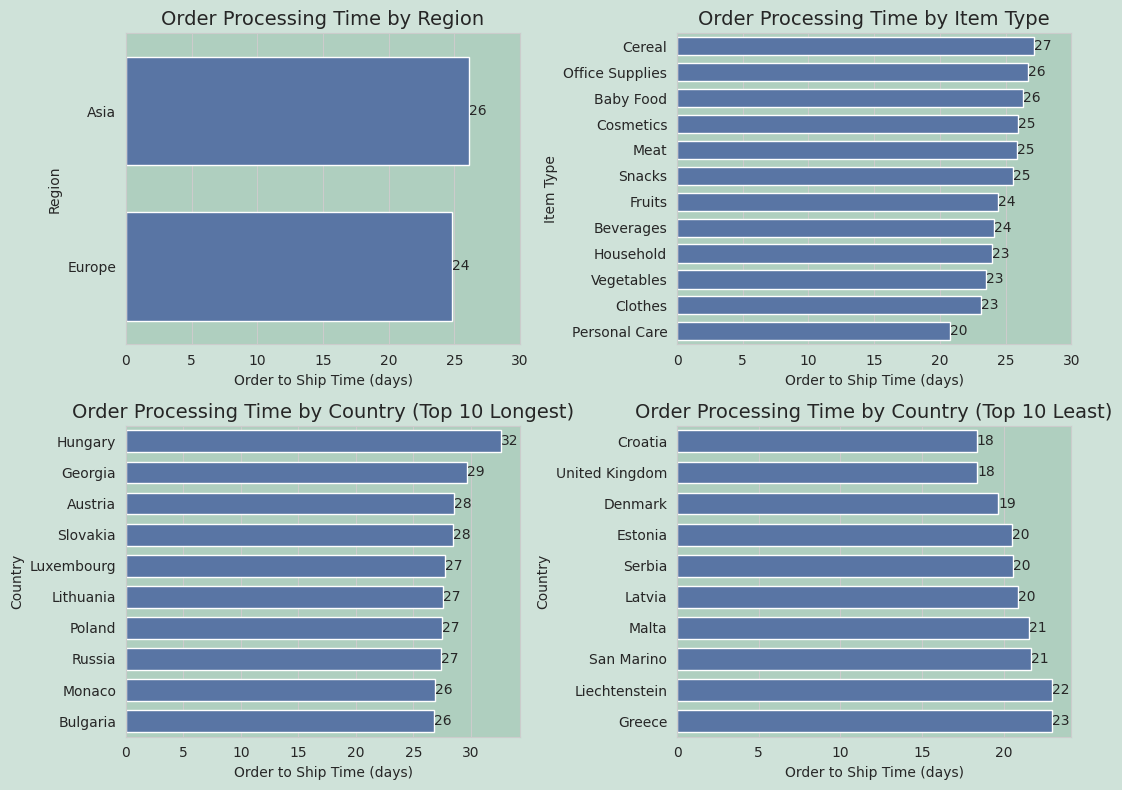

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (11, 8))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

# [0, 0] Order Processing Times by Region (average)
order_processing_time_region = sales_data_df[sales_data_df["Region"] != "Unknown"].groupby("Region")["Order to Ship Time (days)"].mean().reset_index().sort_values(by="Order to Ship Time (days)", ascending=False).nlargest(10, 'Order to Ship Time (days)')

sns.barplot(data=order_processing_time_region, x="Order to Ship Time (days)", y="Region", ax=ax[0, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 0].set_title("Order Processing Time by Region", fontsize=14, fontweight = "medium")
ax[0, 0].set_xlim(0, 30)

for bar in ax[0, 0].patches:
    ax[0, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [0, 1] Order Processing Time by Item Type
order_processing_time_items = sales_data_df.groupby("Item Type")["Order to Ship Time (days)"].mean().reset_index().sort_values(by="Order to Ship Time (days)", ascending=False)

sns.barplot(data=order_processing_time_items, x="Order to Ship Time (days)", y="Item Type", ax=ax[0, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 1].set_title("Order Processing Time by Item Type", fontsize=14, fontweight = "medium")
ax[0, 1].set_xlim(0, 30)

for bar in ax[0, 1].patches:
    ax[0, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 0] Top 10 Countries with Longest Order Processing Times (average)
order_processing_time_countries_desc = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby("Country")["Order to Ship Time (days)"].mean().reset_index().sort_values(by="Order to Ship Time (days)", ascending=False).nlargest(10, 'Order to Ship Time (days)')

sns.barplot(data=order_processing_time_countries_desc, x="Order to Ship Time (days)", y="Country", ax=ax[1, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 0].set_title("Order Processing Time by Country (Top 10 Longest)", fontsize=14, fontweight = "medium")

for bar in ax[1, 0].patches:
    ax[1, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 1] Top 10 Countries with Shortest Order Processing Times (average)
order_processing_time_countries_asc = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby("Country")["Order to Ship Time (days)"].mean().reset_index().sort_values(by="Order to Ship Time (days)", ascending=True).nsmallest(10, 'Order to Ship Time (days)')

sns.barplot(data=order_processing_time_countries_asc, x="Order to Ship Time (days)", y="Country", ax=ax[1, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 1].set_title("Order Processing Time by Country (Top 10 Least)", fontsize=14, fontweight = "medium")

for bar in ax[1, 1].patches:
    ax[1, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

plt.tight_layout()
plt.show()

**Regional Differences:**  
Asia has a slightly longer order processing time than Europe, indicating potential logistical or operational differences.

**Product Category Variations:**  
Cereal and Office Supplies have the longest processing times, suggesting specific handling or supply chain complexities.
Personal Care, Vegetables, and Clothes have the shortest times, implying efficient processing for these items.

**Country-Specific Discrepancies:**  
Hungary has the longest processing time, while Croatia and the United Kingdom have the shortest, highlighting significant variations in operational efficiency across countries.

####Impact of Order Processing Time on Profit

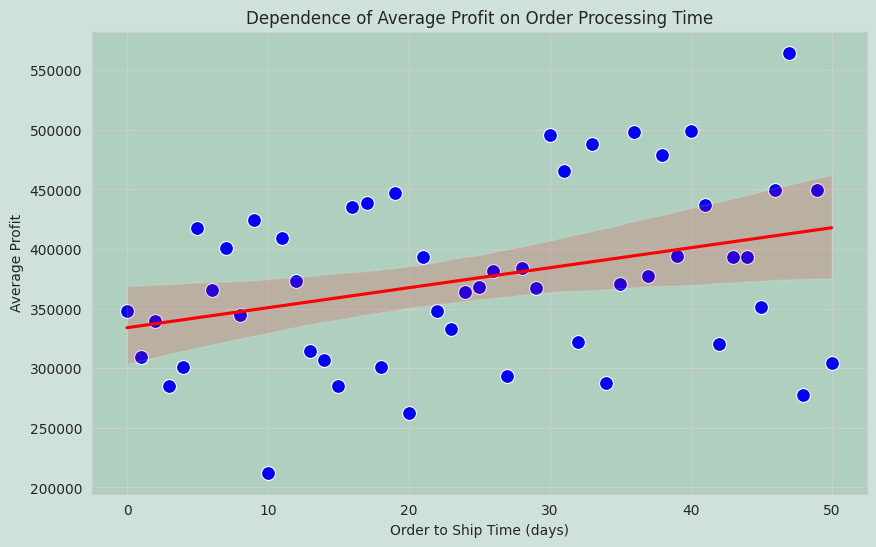

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set_style("whitegrid")
fig.set_facecolor("#cfe2d9")
ax.set_facecolor("#afcfbf")

avg_profit_by_order_processing_time = sales_data_df.groupby('Order to Ship Time (days)')['Total Profit'].mean().reset_index()
sns.scatterplot(data=avg_profit_by_order_processing_time, x='Order to Ship Time (days)', y='Total Profit', color='blue', s=100)

# adding a trend line for trend analysis
sns.regplot(data=avg_profit_by_order_processing_time, x='Order to Ship Time (days)', y='Total Profit', scatter=False, color='red')

plt.title('Dependence of Average Profit on Order Processing Time')
plt.ylabel('Average Profit')

plt.show()

In [ ]:
# calculating the correlation between Order to Ship Time (days) and Average Profit
correlation = avg_profit_by_order_processing_time['Order to Ship Time (days)'].corr(avg_profit_by_order_processing_time['Total Profit'])
print(f"Correlation between Order to Ship Time (days) and Average Profit: {correlation:.2f}")


Correlation between Order to Ship Time (days) and Average Profit: 0.34


The correlation coefficient of 0.34 indicates a weak positive correlation between the shipping time of the product and the average profit. This may suggest that higher-value items or more complex orders require more processing time and generate higher profits.

####Sales Dynamics Analysis by Product Categories, Countries, and Regions

######Sales Dynamics by Item Type Over Time

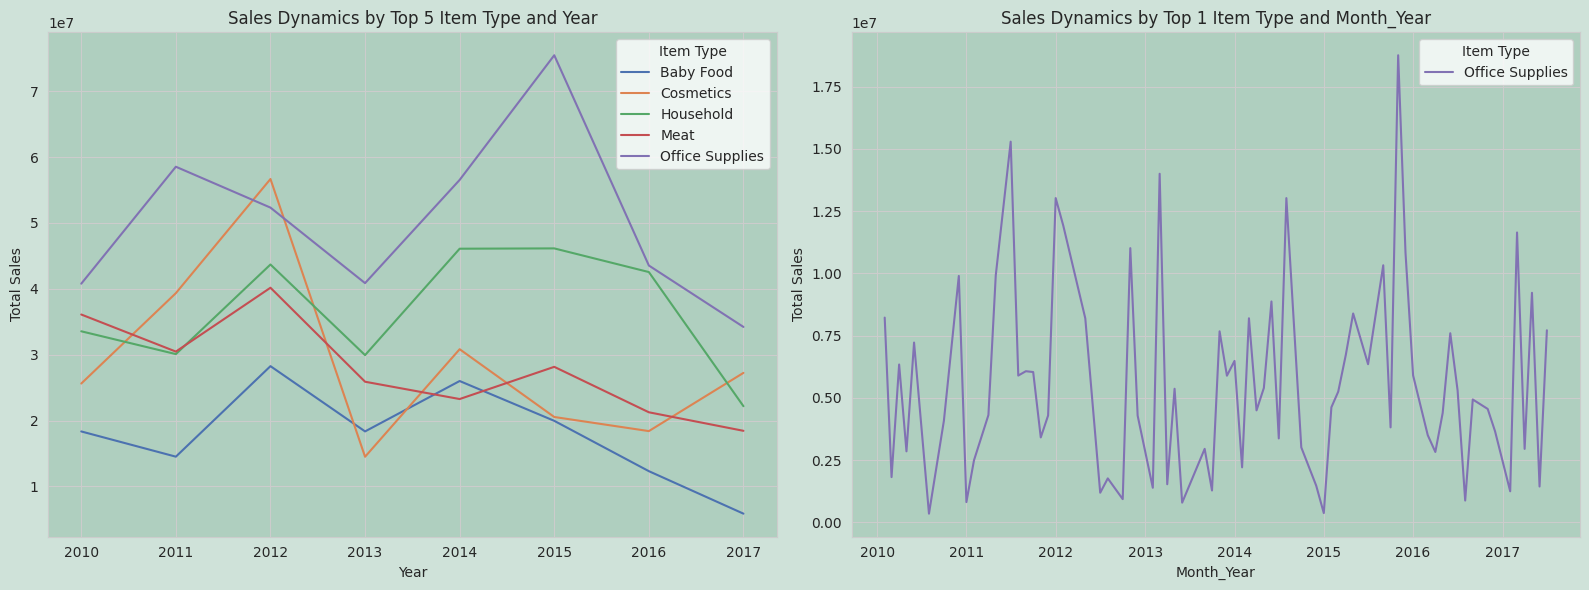

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

# [0] Sales Dynamics by Top 5 Item Type and Year
sales_data_df["Year"] = sales_data_df['Order Date'].dt.year

year_sales_by_items = sales_data_df.groupby(["Year", "Item Type"])["Total Sales"].sum().reset_index()

top_5_items_year = year_sales_by_items.groupby("Item Type")["Total Sales"].sum().nlargest(5).index
year_sales_by_items_top5 = year_sales_by_items[year_sales_by_items["Item Type"].isin(top_5_items_year)]

sns.lineplot(data=year_sales_by_items_top5, x="Year", y="Total Sales", hue="Item Type", ax=ax[0], palette="deep")
ax[0].set_title("Sales Dynamics by Top 5 Item Type and Year")


# [1] Sales Dynamics by Top 1 Item Type and Month_Year
sales_data_df["Month_Year"] = sales_data_df["Order Date"].dt.to_period("M").dt.to_timestamp()

month_sales_by_item = sales_data_df.groupby(["Month_Year", "Item Type"])["Total Sales"].sum().reset_index()

top_1_items_month_year = month_sales_by_item.groupby("Item Type")["Total Sales"].sum().nlargest(1).index
month_year_sales_by_item_top1 = month_sales_by_item[month_sales_by_item["Item Type"].isin(top_1_items_month_year)]

sns.lineplot(data=month_year_sales_by_item_top1, x="Month_Year", y="Total Sales", hue="Item Type", ax=ax[1], palette=[(0.5058823529411764, 0.4470588235294118, 0.7019607843137254)])
ax[1].set_title("Sales Dynamics by Top 1 Item Type and Month_Year")


plt.tight_layout()
plt.show()

**Sales Trends Over Years:**  
"Office Supplies" has the highest sales volume but shows a decreasing trend, indicating potential market saturation or increased competition.
"Cosmetics" and "Household" maintain relatively stable sales, suggesting consistent demand.
"Meat" experienced growth followed by a decline, possibly due to changing consumer preferences or market conditions.
"Baby Food" has the lowest sales among the top 5, and it has been consistently declining since 2014.

**Monthly Fluctuations:**  
"Office Supplies" sales vary significantly throughout the year, suggesting seasonality or promotional impacts.

######Sales Dynamics by Region Over Time

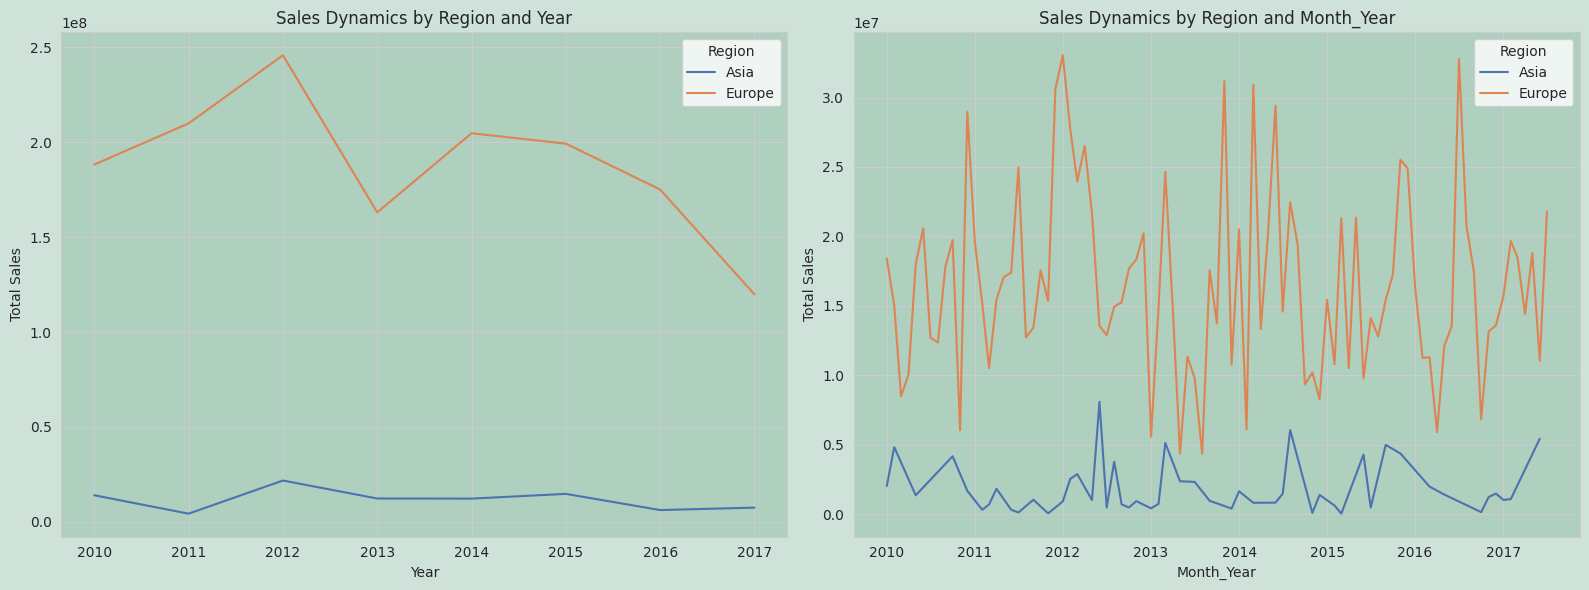

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

# [0] Sales Dynamics by Region and Year
year_sales_by_region = sales_data_df[sales_data_df["Region"] != "Unknown"].groupby(["Year", "Region"])["Total Sales"].sum().reset_index()

sns.lineplot(data=year_sales_by_region, x="Year", y="Total Sales", hue="Region", ax=ax[0], palette="deep")
ax[0].set_title("Sales Dynamics by Region and Year")

# [1] Sales Dynamics by Region and Month_Year
month_sales_by_region = sales_data_df[sales_data_df["Region"] != "Unknown"].groupby(["Month_Year", "Region"])["Total Sales"].sum().reset_index()

sns.lineplot(data=month_sales_by_region, x="Month_Year", y="Total Sales", hue="Region", ax=ax[1], palette="deep")
ax[1].set_title("Sales Dynamics by Region and Month_Year")


plt.tight_layout()
plt.show()

**Europe's Dominance:**  
Europe outperforms Asia in sales volume, indicating stronger demand and market presence. This could be due to higher brand awareness, a larger customer base, or more effective sales strategies.

**Europe's Peak and Stabilization:**  
Sales in Europe peaked in 2012, followed by stabilization with fluctuations, suggesting market saturation or increased competition after 2012. These fluctuations may be due to seasonal trends, economic factors, or changing consumer behavior.

**Asia's Consistent Performance:**  
Asia's sales remained stable but low, possibly due to a smaller market or challenges in market penetration. However, the consistent performance indicates stability despite lower sales.

**Monthly Trends:**

**Europe's Seasonality:**  
Europe shows significant monthly fluctuations, pointing to strong seasonality. Factors like weather, holidays, or cultural events may influence these patterns, which can guide inventory, marketing, and pricing strategies.

**Asia's Stability:**  
Asia shows minimal monthly variations, reflecting stable demand throughout the year, likely due to a more diverse customer base and less seasonal impact.

**Overall**, Europe shows higher sales but with more fluctuations, while Asia remains stable but with lower sales. Recognizing these differences helps tailor regional strategies, optimize operations, and increase profitability.

######Sales Dynamics by Country Over Time

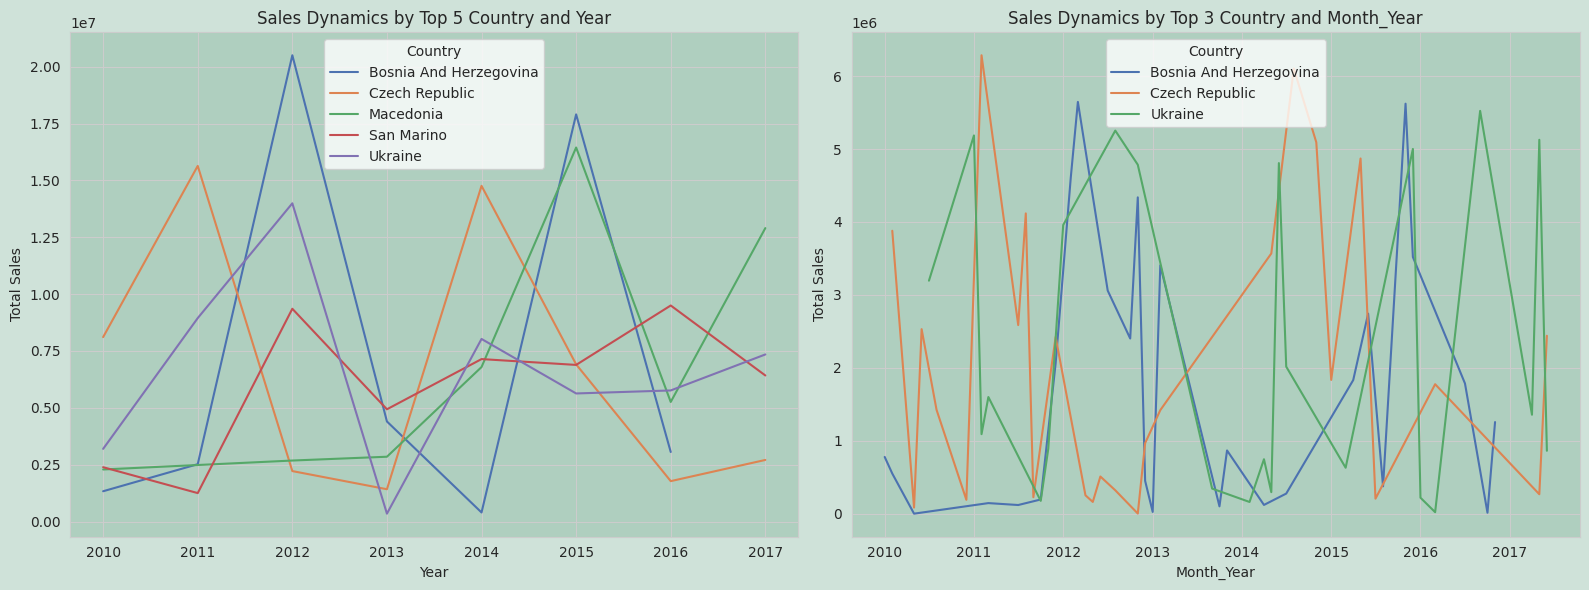

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

# [0] Sales Dynamics by Top 5 Country and Year

# group by Year and Country, summing Total Sales
year_sales_by_country = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby(["Year", "Country"])["Total Sales"].sum().reset_index()

# get the top 5 countries by total sales across all years
top_5_countries_year = year_sales_by_country.groupby("Country")["Total Sales"].sum().nlargest(5).index

# Filter data to include only the top 5 countries
year_sales_by_country_top5 = year_sales_by_country[year_sales_by_country["Country"].isin(top_5_countries_year)]

sns.lineplot(data=year_sales_by_country_top5, x="Year", y="Total Sales", hue="Country", ax=ax[0], palette="deep")
ax[0].set_title("Sales Dynamics by Top 5 Country and Year")


# [1] Sales Dynamics by Top 3 Country and Month_Year
month_sales_by_country = sales_data_df[sales_data_df["Country"] != "Unknown"].groupby(["Month_Year", "Country"])["Total Sales"].sum().reset_index()

top_3_countries_month_year = month_sales_by_country.groupby("Country")["Total Sales"].sum().nlargest(3).index
month_year_sales_by_country_top3 = month_sales_by_country[month_sales_by_country["Country"].isin(top_3_countries_month_year)]

sns.lineplot(data=month_year_sales_by_country_top3, x="Month_Year", y="Total Sales", hue="Country", ax=ax[1], palette="deep")
ax[1].set_title("Sales Dynamics by Top 3 Country and Month_Year")


plt.tight_layout()
plt.show()



**Yearly Trends:**  
*   Market Leaders: Ukraine and the Czech Republic lead in sales, but fluctuations suggest potential market volatility or sensitivity to external factors.
*   Variable Performance: Bosnia and Herzegovina, Macedonia, and San Marino show lower sales but significant fluctuations, indicating less stable market conditions.
*   Peak Year: 2012 stands out as a peak year across most countries, possibly due to a general economic upswing or effective marketing.

**Monthly Trends:**  
*   Seasonality: Monthly fluctuations are observed in all countries, indicating seasonal influences, such as holidays or weather changes affecting demand.
*   Ukrainian Volatility: Ukraine shows the most significant month-to-month fluctuations, suggesting market instability or high sensitivity to external factors.

####Sales Analysis by Day of Week and Seasonal Products Identification

In [ ]:
# add a column with the days of the week
sales_data_df["Day of the Week"] = sales_data_df["Order Date"].dt.day_name()

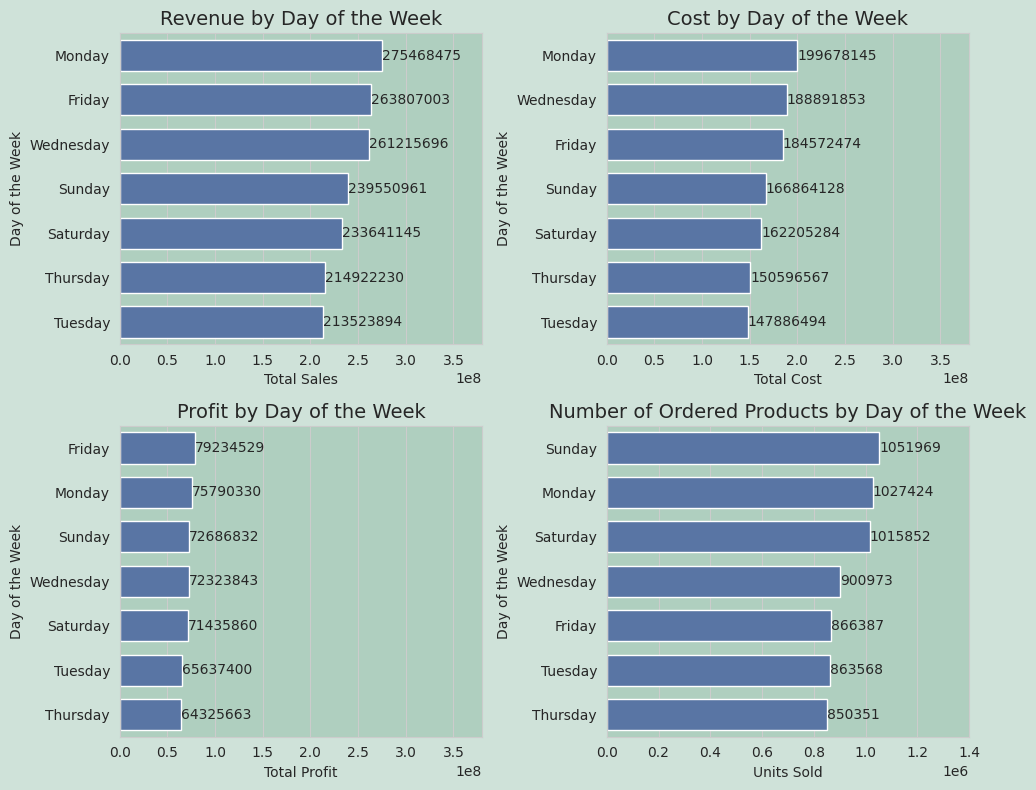

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

plt.gcf().set_facecolor("#cfe2d9")

for axes in ax.flat:
    axes.set_facecolor("#afcfbf")

sns.set_style("whitegrid")

colors_deep = sns.color_palette("deep")


# [0, 0] Total Sales by Day of the Week
revenue_by_category = sales_data_df.groupby("Day of the Week")["Total Sales"].sum().reset_index().sort_values(by="Total Sales", ascending=False)

sns.barplot(data=revenue_by_category, x="Total Sales", y="Day of the Week", ax=ax[0, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 0].set_title("Revenue by Day of the Week", fontsize=14, fontweight = "medium")
ax[0, 0].set_xlim(0, 3.8e8)

for bar in ax[0, 0].patches:
    ax[0, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [0, 1] Total Cost by Day of the Week
cost_by_category = sales_data_df.groupby("Day of the Week")["Total Cost"].sum().reset_index().sort_values(by="Total Cost", ascending=False)

sns.barplot(data=cost_by_category, x="Total Cost", y="Day of the Week", ax=ax[0, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[0, 1].set_title("Cost by Day of the Week", fontsize=14, fontweight = "medium")
ax[0, 1].set_xlim(0, 3.8e8)

for bar in ax[0, 1].patches:
    ax[0, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 0] Total Profit by Day of the Week
profit_by_category = sales_data_df.groupby("Day of the Week")["Total Profit"].sum().reset_index().sort_values(by="Total Profit", ascending=False)

sns.barplot(data=profit_by_category, x="Total Profit", y="Day of the Week", ax=ax[1, 0], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 0].set_title("Profit by Day of the Week", fontsize=14, fontweight = "medium")
ax[1, 0].set_xlim(0, 3.8e8)

for bar in ax[1, 0].patches:
    ax[1, 0].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

# [1, 1] Number of Ordered Products by Day of the Week
popularity_items_by_category = sales_data_df.groupby("Day of the Week")["Units Sold"].sum().reset_index().sort_values(by="Units Sold", ascending=False)

sns.barplot(data=popularity_items_by_category, x="Units Sold", y="Day of the Week", ax=ax[1, 1], color=colors_deep[0], errorbar=("ci", False), width=0.7)
ax[1, 1].set_title("Number of Ordered Products by Day of the Week", fontsize=14, fontweight = "medium")
ax[1, 1].set_xlim(0, 1.4e6)


for bar in ax[1, 1].patches:
    ax[1, 1].text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center"
    )

plt.tight_layout()
plt.show()

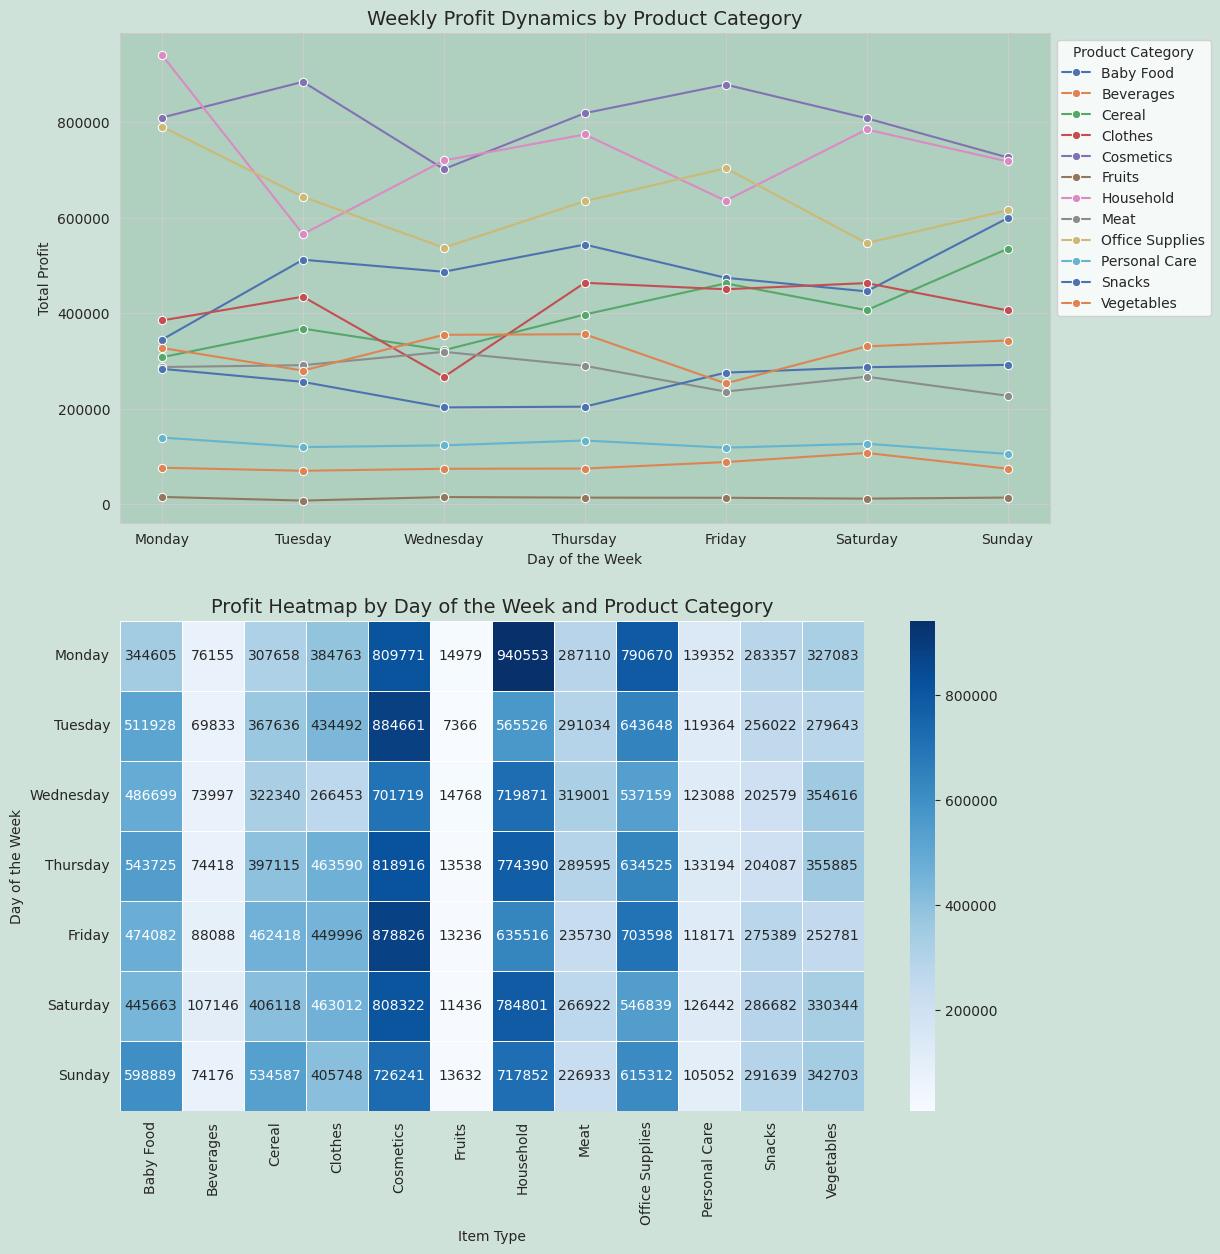

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

sns.set_style("whitegrid")
fig.set_facecolor("#cfe2d9")
for axes in ax.flat:
  axes.set_facecolor("#afcfbf")

# Convert the "Day of the Week" column to a categorical type with a specified order from Monday to Sunday
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_data_df["Day of the Week"] = pd.Categorical(sales_data_df["Day of the Week"], categories=day_order, ordered=True)

# [0] weekly Profit Dynamics by Product Category
category_sales_by_day = sales_data_df.groupby(["Day of the Week", "Item Type"], observed=False)["Total Profit"].mean().reset_index()

sns.lineplot(data=category_sales_by_day, x="Day of the Week", y="Total Profit", hue="Item Type", palette="deep", ax=ax[0], marker="o")
ax[0].set_title("Weekly Profit Dynamics by Product Category", fontsize=14, fontweight = "medium")

# position the legend outside the plot (top-right)
ax[0].legend(title="Product Category", bbox_to_anchor=(1, 1), loc="upper left")


# [1] profit Heatmap by Day of the Week and Product Category
category_sales_by_day = sales_data_df.groupby(["Day of the Week", "Item Type"], observed=False)["Total Profit"].mean().unstack()

sns.heatmap(category_sales_by_day, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5, ax=ax[1])
ax[1].set_title("Profit Heatmap by Day of the Week and Product Category", fontsize=14, fontweight = "medium")

plt.show()

The sales analysis by day of the week reveals a clear weekly pattern. The highest revenue and profit are observed on Monday and Friday, while the lowest are on Tuesday and Thursday. Order volume peaks on weekends and Monday, indicating active consumer behavior.

The profit heatmap by product categories shows "seasonality" for certain products: "Cosmetics" and "Household" have higher profits on weekends and Monday, "Office Supplies" on Friday and Monday, and "Meat" on Wednesday. "Fruits" consistently show low profitability.

The profit dynamics graph confirms these findings, showing profit fluctuations throughout the week. To optimize sales, it is necessary to investigate factors influencing demand and profitability, adapt marketing strategies and inventory management to demand fluctuations, and analyze the reasons for the low profitability of the "Fruits" category and take steps to improve it.

###Sales Performance Analysis and Business Optimization

1. **Product Categories**
* Office Supplies has the highest sales volume and expenses, indicating strong demand. However, sales are declining, possibly due to market saturation.
* Cosmetics is the most profitable category, benefiting from high margins and stable demand.
* Fruits have high demand but minimal profitability. Reviewing pricing and logistics costs could improve financial performance.

2. **Geographical Analysis**  
* The top revenue-generating countries are the Czech Republic and Ukraine, indicating high sales volumes.
* The most profitable country is Andorra, likely due to effective cost management or higher pricing.
* A high number of orders in San Marino and Andorra suggests an active customer base and potential for further expansion.
* Sales in Asia are stable but lower than in Europe, where seasonal fluctuations are observed. Adapting strategies to regional specifics is advisable.

3. **Sales Channels**  
* Offline sales generate higher revenue and profit but come with higher costs.
* The online channel remains profitable and has an equal number of orders as the offline channel, indicating similar popularity. Optimizing offline expenses could increase overall profitability.

4. **Order Fulfillment Time**  
* Orders in Asia take longer to process than in Europe, likely due to differences in logistics infrastructure.
* The longest processing times are observed in Cereals and Office Supplies, possibly due to supply chain complexity or high demand.
* Hungary has the longest order fulfillment time, while the fastest processes are seen in Croatia and the United Kingdom.

5. **Impact of Processing Time on Profitability**  
* A weak positive correlation (0.34) was found between order fulfillment time and average profit, suggesting that more expensive or complex products take longer to process.

6. **Seasonality and Weekly Trends**  
* The highest revenue and profits occur on Mondays and Fridays, while the lowest are on Tuesdays and Thursdays.
* The highest number of orders is placed on weekends, likely due to shifts in consumer behavior.
* Cosmetics and Home Goods show stable sales on weekends and Mondays.

**Recommendations**  
* Review pricing and cost structures for the "Fruits" category to improve profitability.
* Develop regional strategies tailored to European market fluctuations and growth opportunities in Asia.
* Optimize offline sales expenses to enhance overall profitability.
* Improve logistics efficiency in countries with the longest processing times, particularly in Hungary.
* Leverage weekly sales trends to optimize warehouse operations, staffing, and marketing activities.
* Analyze declining sales in "Office Supplies" to identify causes and adjust marketing strategies.
* Expand sales in highly profitable regions, particularly in Andorra and San Marino, to drive further profit growth.